In [90]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel('/content/Enhancing Keyword Search Efficiency in Big Data_ A Comparative Analysis of Algorithms and Techniques (Responses).xlsx')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.columns

Index(['Timestamp',
       '1.Do you use any voice assistants (e.g., Siri, Google Assistant, Amazon Alexa) to search for information or perform tasks?',
       '2 How frequently do you rely on voice assistants for conducting searches or obtaining information?',
       '3. In what contexts or situations do you find voice assistants most convenient or beneficial for search-related tasks?',
       '4.What types of queries or requests do you typically use voice assistants for?',
       '5. Are there specific tasks or queries that you prefer to perform using voice commands rather than typing?',
       '6. How would you rate your overall experience with using voice assistants for search purposes?',
       '7. Have you encountered any limitations or challenges when using voice assistants for search? If yes, please describe.',
       '8.Do you find voice-based search to be more efficient or intuitive compared to traditional text-based search methods?',
       '9.In your experience, how accurat

In [ ]:
relevant_columns = [
    '3. In what contexts or situations do you find voice assistants most convenient or beneficial for search-related tasks?',
    '4.What types of queries or requests do you typically use voice assistants for?',
    '5. Are there specific tasks or queries that you prefer to perform using voice commands rather than typing?',
    '6. How would you rate your overall experience with using voice assistants for search purposes?',
    '7. Have you encountered any limitations or challenges when using voice assistants for search? If yes, please describe.',
    '8.Do you find voice-based search to be more efficient or intuitive compared to traditional text-based search methods?',
    '9.In your experience, how accurate are voice assistants in understanding your search queries and providing relevant information?',
    '10. Have you ever encountered instances where the voice assistant misunderstood your query or provided inaccurate search results? If yes, how did you address it?',
    '11. Do you primarily use voice assistants on smartphones, smart speakers, or other devices? How does the device type influence your search behavior?',
    '12. Are there any specific features or functionalities of voice assistant-enabled devices that enhance your search experience?',
    '13. How concerned are you about privacy and security when using voice assistants to conduct searches? What measures, if any, do you take to protect your privacy?',
    '14. Are there any privacy-related considerations that would make you hesitant to use voice assistants for certain types of searches or tasks?',
    '15. Do you anticipate using voice assistants more frequently for search-related tasks in the future? If yes, what factors would contribute to increased adoption?',
    '16.What improvements or enhancements would you like to see in voice assistant technology to make it more effective for conducting searches?',
    '17. Reflecting on your experiences with voice assistants for search, how satisfied are you with the current state of voice assistant technology in meeting your information needs?',
    '18.When conducting a search, what factors typically catch your attention when scanning through the search results?',
    '19.Do you tend to click on websites that appear at the top of the search results, or do you consider other factors before making a selection?',
    '20. How important is the website\'s meta title and meta description in influencing your decision to click on a particular search result?',
    '21.What role does the relevance of the search result\'s title and snippet play in determining whether you click on a website?',
    '22. Are there specific types of content (e.g., articles, videos, product listings) that you\'re more likely to click on based on your search intent?',
    '23. How important is the perceived trustworthiness and credibility of a website in your decision-making process when clicking on search results?',
    '24.What signals or indicators do you look for to assess the reliability of a website before clicking on it?',
    '25.Have you ever avoided clicking on a search result due to concerns about security, privacy, or the credibility of the website?',
    '26.Do you find that the visual appearance (e.g., website design, imagery) of a search result influences your decision to click on it?',
    '27.Are you more likely to click on search results from recognizable brands or websites with which you\'re familiar?',
    '28.How much importance do you place on the overall user experience (UX) of a website when deciding whether to click on a search result?',
    '29.Do you notice any differences in your clicking behavior when searching on a mobile device compared to a desktop or laptop?',
    '30.Are there any specific features or characteristics of mobile search results that affect your decision to click on a website?',
    '31. Is there anything else you would like to share about your experiences, challenges, or preferences regarding the use of voice assistants for search-related tasks?',
    '32. Do you have any feedback or suggestions for search engines or websites to improve the relevance, accuracy, or quality of search results?',
    '33. How do you envision the future of search engines with the integration of AI technologies? Are there any specific features or functionalities you would like to see implemented to enhance the search experience further?'
]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
target_column = '1.Do you use any voice assistants (e.g., Siri, Google Assistant, Amazon Alexa) to search for information or perform tasks?'
X = df.drop(columns=[target_column, 'Timestamp'])
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train.iloc[:, 0])
X_test_vec = vectorizer.transform(X_test.iloc[:, 0])
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)
y_pred = nb_classifier.predict(X_test_vec)
print("Predictions:", y_pred)
print(classification_report(y_test, y_pred))

Predictions: ['Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes']
              precision    recall  f1-score   support

          No       1.00      0.38      0.55         8
         Yes       0.80      1.00      0.89        20

    accuracy                           0.82        28
   macro avg       0.90      0.69      0.72        28
weighted avg       0.86      0.82      0.79        28



In [ ]:
import numpy as np
class_labels = nb_classifier.classes_
feature_probabilities = nb_classifier.feature_log_prob_
prob_df = pd.DataFrame(feature_probabilities, columns=feature_names, index=class_labels)
prob_df = prob_df.T
top_features = {}
for class_label in class_labels:
    top_features[class_label] = prob_df[class_label].nlargest(10)
for class_label, top_feats in top_features.items():
    print(f"Top features for class '{class_label}':")
    print(top_feats)
    print()


Top features for class 'No':
rarely         -1.011601
never          -1.299283
frequently     -1.704748
occasionally   -1.992430
very           -3.091042
Name: No, dtype: float64

Top features for class 'Yes':
frequently     -0.844187
occasionally   -1.146468
rarely         -1.964779
very           -2.274934
never          -4.672829
Name: Yes, dtype: float64



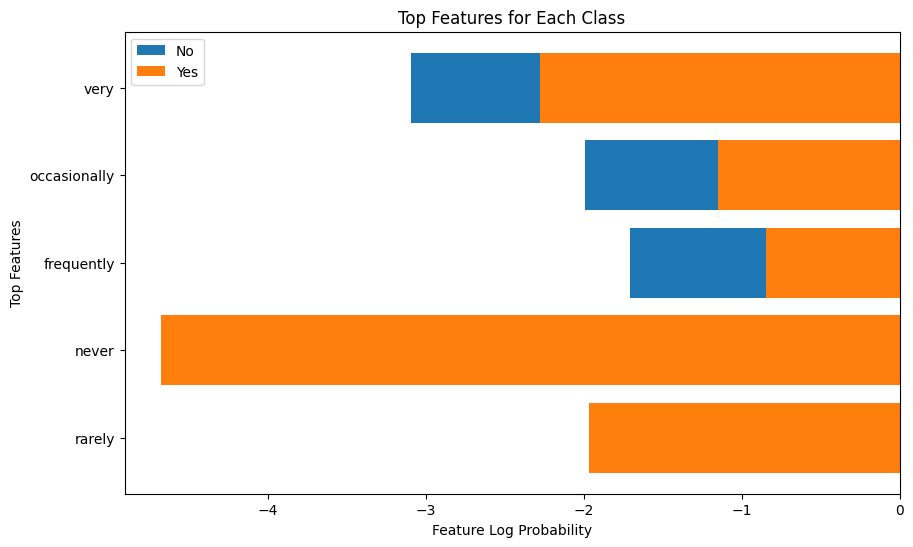

In [ ]:
import matplotlib.pyplot as plt

# Plot the top features for each class
plt.figure(figsize=(10, 6))
for class_label, top_feats in top_features.items():
    plt.barh(top_feats.index, top_feats.values, label=class_label)

plt.xlabel('Feature Log Probability')
plt.ylabel('Top Features')
plt.title('Top Features for Each Class')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
numerical_columns = X.select_dtypes(include=np.number).columns
categorical_columns = X.select_dtypes(include='object').columns
y_numeric = pd.factorize(y)[0]
point_biserial_corr = {}
for col in numerical_columns:
    corr, _ = stats.pointbiserialr(X[col], y_numeric)
    point_biserial_corr[col] = corr
chi2_stats = {}
for col in categorical_columns:
    contingency_table = pd.crosstab(X[col], y)
    chi2, _, _, _ = stats.chi2_contingency(contingency_table)
    chi2_stats[col] = chi2
correlation_df = pd.DataFrame({'Point Biserial Correlation': point_biserial_corr, 'Chi-squared statistic': chi2_stats})
print("Correlation Report:")
print(correlation_df)


Correlation Report:
                                                    Point Biserial Correlation  \
17. Reflecting on your experiences with voice a...                    0.132055   
23. How important is the perceived trustworthin...                    0.101472   
28.How much importance do you place on the over...                    0.027473   
2 How frequently do you rely on voice assistant...                         NaN   
3. In what contexts or situations do you find v...                         NaN   
4.What types of queries or requests do you typi...                         NaN   
5. Are there specific tasks or queries that you...                         NaN   
6. How would you rate your overall experience w...                         NaN   
7. Have you encountered any limitations or chal...                         NaN   
8.Do you find voice-based search to be more eff...                         NaN   
9.In your experience, how accurate are voice as...                         NaN

# Inferences Chart

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the survey responses

# Drop the first column
df = df.drop(columns=df.columns[0])

# Initialize a dictionary to store option counts
option_counts = {}

# Iterate through each column
for column in df.columns:
    # Count the occurrences of each option
    counts = df[column].value_counts().to_dict()
    # Store the counts in the dictionary
    option_counts[column] = counts

# Print the option counts
for question, counts in option_counts.items():
    print(f"Question: {question}")
    for option, count in counts.items():
        print(f"{option}: {count}")

Question: 2 How frequently do you rely on voice assistants for conducting searches or obtaining information?
Occasionally: 46
Frequently: 44
Rarely: 26
Very frequently: 13
Never: 8
Question: 3. In what contexts or situations do you find voice assistants most convenient or beneficial for search-related tasks?
When my hands are occupied: 53
When multitasking: 41
When driving: 21
When I need quick answers: 19
never: 1
N.A: 1
No: 1
Question: 4.What types of queries or requests do you typically use voice assistants for?
Asking questions: 61
Getting directions: 35
Searching for products/services: 25
Setting reminders or alarms: 10
never: 1
N.A: 1
Music related : 1
No: 1
Not using at all: 1
Playing music and settings alarms: 1
Question: 5. Are there specific tasks or queries that you prefer to perform using voice commands rather than typing?
Yes: 88
No: 49
Question: 6. How would you rate your overall experience with using voice assistants for search purposes?
Good: 78
Fair: 28
Excellent: 25
P

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the survey responses

# Drop the first column
df = df.drop(columns=df.columns[0])

In [94]:
df.head()

,"1.Do you use any voice assistants (e.g., Siri, Google Assistant, Amazon Alexa) to search for information or perform tasks?",2 How frequently do you rely on voice assistants for conducting searches or obtaining information?,3. In what contexts or situations do you find voice assistants most convenient or beneficial for search-related tasks?,4.What types of queries or requests do you typically use voice assistants for?,5. Are there specific tasks or queries that you prefer to perform using voice commands rather than typing?,6. How would you rate your overall experience with using voice assistants for search purposes?,"7. Have you encountered any limitations or challenges when using voice assistants for search? If yes, please describe.",8.Do you find voice-based search to be more efficient or intuitive compared to traditional text-based search methods?,"9.In your experience, how accurate are voice assistants in understanding your search queries and providing relevant information?","10. Have you ever encountered instances where the voice assistant misunderstood your query or provided inaccurate search results? If yes, how did you address it?",...,24.What signals or indicators do you look for to assess the reliability of a website before clicking on it?,"25.Have you ever avoided clicking on a search result due to concerns about security, privacy, or the credibility of the website?","26.Do you find that the visual appearance (e.g., website design, imagery) of a search result influences your decision to click on it?",27.Are you more likely to click on search results from recognizable brands or websites with which you're familiar?,28.How much importance do you place on the overall user experience (UX) of a website when deciding whether to click on a search result?,29.Do you notice any differences in your clicking behavior when searching on a mobile device compared to a desktop or laptop?,30.Are there any specific features or characteristics of mobile search results that affect your decision to click on a website?,"31. Is there anything else you would like to share about your experiences, challenges, or preferences regarding the use of voice assistants for search-related tasks?","32. Do you have any feedback or suggestions for search engines or websites to improve the relevance, accuracy, or quality of search results?",33. How do you envision the future of search engines with the integration of AI technologies? Are there any specific features or functionalities you would like to see implemented to enhance the search experience further?
0,Yes,Very frequently,When my hands are occupied,Asking questions,Yes,Excellent,Yes,"Yes, more efficient",Very accurate,Yes,...,Domain authority,Yes,Yes,Yes,1,Yes,Yes,Nothing,Audio catch problems sometimes,...
1,Yes,Occasionally,When driving,Getting directions,Yes,Fair,No,"Yes, more intuitive",Sometimes accurate,Yes,...,User reviews/testimonials,Yes,Yes,Yes,2,Yes,Yes,Sometime it catches something and give some ot...,"No, that's fine",Definately AI helps a lot by giving as suggest...
2,Yes,Occasionally,When my hands are occupied,Asking questions,No,Fair,No,"Yes, more efficient",Mostly accurate,Yes,...,Domain authority,Yes,No,Yes,2,Yes,No,NaN,NaN,NaN
3,Yes,Occasionally,When multitasking,Asking questions,No,Fair,Yes,"Yes, more intuitive",Mostly accurate,Yes,...,Domain authority,Yes,Yes,Yes,1,Yes,No,NaN,NaN,NaN
4,Yes,Occasionally,When multitasking,Asking questions,Yes,Good,Yes,"No, I prefer text-based search methods",Mostly accurate,Yes,...,User reviews/testimonials,No,Yes,Yes,1,Yes,Yes,Na,Na,Na


In [97]:
# Initialize a dictionary to store option counts
option_counts = {}

# Iterate through each column
for column in df.columns:
    # Count the occurrences of each option
    counts = df[column].value_counts().to_dict()
    # Store the counts in the dictionary
    option_counts[column] = counts

# Determine the number of plots needed
num_plots = len(option_counts)

# Set the figure size for each subplot
fig_height = num_plots * 12  # Increase the height of each subplot

# Create subplots with one plot per row
fig, axes = plt.subplots(num_plots, 1, figsize=(23, fig_height))

# Iterate through option counts and plot
for ax, (question, counts) in zip(axes, option_counts.items()):
    ax.bar(counts.keys(), counts.values())
    ax.set_xlabel('Options')
    ax.set_ylabel('Count')
    ax.set_title(f'Option Counts for {question}')
    ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()